In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [1]:
data=pd.read_csv('ecg_autoencoder_dataset.csv',header=None)

NameError: name 'pd' is not defined

In [81]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,0.071195,0.123925,0.103124,0.225228,0.128683,0.302483,0.257276,0.196352,0.179383,0.244729,...,0.468576,0.442818,0.468274,0.432493,0.407958,0.418623,0.362531,0.410959,0.471666,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,0.271695,0.259003,0.269202,0.127065,0.202073,0.255983,0.153115,0.210216,0.191082,0.190927,...,0.399107,0.387508,0.255703,0.284034,0.284993,0.250108,0.173036,0.149423,0.141685,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,0.109521,0.158078,0.291898,0.261294,0.188407,0.140651,0.263365,0.287207,0.314317,0.177942,...,0.394381,0.405020,0.597563,0.531130,0.377651,0.467701,0.457569,0.341116,0.407913,0.459127,0.403937,0.298191,0.461101,0.664659,0.587757,0.701325,0.917205,1.247987,1.505568,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.14917

In [82]:
X=data.drop([140],axis=1).values
y=data[140].values

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [84]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
encoder =Sequential([Dense(64,activation='relu',input_shape=(X_train.shape[1],))])
decoder =Sequential([Dense(X_train.shape[1],activation='sigmoid')])
autoencoder=Sequential([encoder,decoder])

In [86]:
autoencoder.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])
autoencoder.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_26 (Sequential)  (None, 64)                9024      
                                                                 
 sequential_27 (Sequential)  (None, 140)               9100      
                                                                 
Total params: 18,124
Trainable params: 18,124
Non-trainable params: 0
_________________________________________________________________


In [87]:
r=autoencoder.fit(X_train,X_train,batch_size=64,epochs=200,validation_data=(X_test,X_test))

Epoch 1/200
55/55 [==============================] - 0s 4ms/step - loss: 0.9779 - accuracy: 0.0257 - val_loss: 0.7794 - val_accuracy: 0.0387
Epoch 2/200
55/55 [==============================] - 0s 2ms/step - loss: 0.7348 - accuracy: 0.0606 - val_loss: 0.7097 - val_accuracy: 0.0887
Epoch 3/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.0709 - val_loss: 0.6876 - val_accuracy: 0.0960
Epoch 4/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.0849 - val_loss: 0.6757 - val_accuracy: 0.0933
Epoch 5/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.0923 - val_loss: 0.6682 - val_accuracy: 0.1000
Epoch 6/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.1026 - val_loss: 0.6631 - val_accuracy: 0.1147
Epoch 7/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.1129 - val_loss: 0.6592 - val_accuracy: 0.1320
Epoch 8/200
5

Epoch 59/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.2547 - val_loss: 0.6353 - val_accuracy: 0.2547
Epoch 60/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.2521 - val_loss: 0.6352 - val_accuracy: 0.2613
Epoch 61/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.2501 - val_loss: 0.6350 - val_accuracy: 0.2587
Epoch 62/200
55/55 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.2541 - val_loss: 0.6350 - val_accuracy: 0.2613
Epoch 63/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.2573 - val_loss: 0.6348 - val_accuracy: 0.2507
Epoch 64/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.2504 - val_loss: 0.6348 - val_accuracy: 0.2493
Epoch 65/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.2624 - val_loss: 0.6347 - val_accuracy: 0.2540
Epoch 

55/55 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.3290 - val_loss: 0.6301 - val_accuracy: 0.3200
Epoch 174/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.3290 - val_loss: 0.6301 - val_accuracy: 0.3187
Epoch 175/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.3313 - val_loss: 0.6300 - val_accuracy: 0.3253
Epoch 176/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.3288 - val_loss: 0.6301 - val_accuracy: 0.3367
Epoch 177/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.3288 - val_loss: 0.6301 - val_accuracy: 0.3313
Epoch 178/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.3279 - val_loss: 0.6300 - val_accuracy: 0.3313
Epoch 179/200
55/55 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.3308 - val_loss: 0.6300 - val_accuracy: 0.3320
Epoch 180/200

In [90]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.legend(*args, **kwargs)>

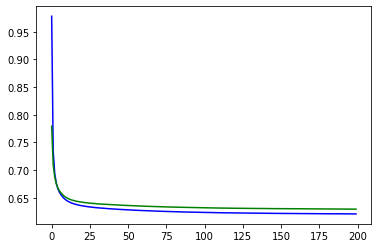

In [91]:
plt.plot(r.history['loss'],label='loss',color='blue')
plt.plot(r.history['val_loss'],label='val_loss',color='green')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

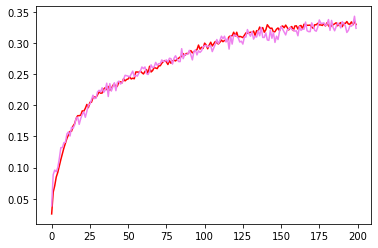

In [92]:
plt.plot(r.history['accuracy'],label='accuracy',color='red')
plt.plot(r.history['val_accuracy'],label='val_accuracy',color='violet')
plt.legend

In [93]:
decoded_data=autoencoder.predict(X_test)
mse=np.mean(np.power(X_test-decoded_data,2),axis=1)
threshold=np.percentile(mse,95)

47/47 [==============================] - 0s 803us/step


In [94]:
outliers=mse>threshold

In [95]:
print("Confusion Matrix: ",confusion_matrix(Y_test,outliers))
print("Classification report: ",classification_report(Y_test,outliers))

Confusion Matrix:  [[575  47]
 [850  28]]
Classification report:                precision    recall  f1-score   support

           0       0.40      0.92      0.56       622
           1       0.37      0.03      0.06       878

    accuracy                           0.40      1500
   macro avg       0.39      0.48      0.31      1500
weighted avg       0.39      0.40      0.27      1500



In [96]:
np.sum(outliers==0)

1425

In [100]:
num_outliers = np.sum(outliers)
num_anomalies = np.sum(Y_test[outliers==True] == 1)
print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 28
